<a href="https://colab.research.google.com/github/AmeenReda1/ML-sentiment-analysis/blob/main/MLProject(Sentiment_Analysis).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Essential Libraries**

In [ ]:
!pip install nltk

In [ ]:
import pandas as pd
import re
from __future__ import unicode_literals
import string
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import svm,preprocessing,metrics
from nltk import word_tokenize
from nltk.stem.isri import ISRIStemmer
st = ISRIStemmer()
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# **Get the Data and Removing non necessarily columns**

In [ ]:
trainData = pd.read_csv("/content/drive/MyDrive/ArSarcasm_train.csv")
testData = pd.read_csv("/content/drive/MyDrive/ArSarcasm_test.csv")

In [ ]:
print("Number Of All Tweets:",trainData.shape[0]+testData.shape[0])
print("Number Of Train Tweets:",trainData.shape[0])
print("Number Of Test Tweets:",testData.shape[0])

Number Of All Tweets: 10547
Number Of Train Tweets: 8437
Number Of Test Tweets: 2110


In [ ]:
trainData.head()

,dialect,sarcasm,sentiment,original_sentiment,tweet,source
0,gulf,False,negative,negative,"""نصيحه ما عمرك اتنزل لعبة سوبر ماريو مش زي ما ...",semeval
1,msa,False,neutral,positive,"""#نادين_نسيب_نجيم ❤️❤️❤️مجلة #ماري_كلير 💭#ملكة...",semeval
2,egypt,False,neutral,neutral,"""@Alito_NBA اتوقع انه بيستمر""",semeval
3,levant,True,neutral,negative,"""@KSA24 يعني ""بموافقتنا"" لأن دمشق صايرة موسكو""",semeval
4,msa,False,neutral,negative,"""RT @alaahmad20: قائد في الحرس يعترف بفقدان ال...",semeval


In [ ]:
testData.head()

,dialect,sarcasm,sentiment,original_sentiment,tweet,source
0,msa,True,negative,negative,"""@AbuEmad74241481 @Cesars2014 هههههه حزب الله ...",semeval
1,gulf,False,positive,neutral,"""RT @JannetForster: البنات اللي م صامو بقولكم ...",semeval
2,msa,True,neutral,neutral,اشارة رابعة اشبه بنار تحرق الانقلابيين,astd
3,msa,False,neutral,neutral,"""@EGYPTAIR ماهي مميزات درجه بزنس علماً اني في ...",semeval
4,msa,False,neutral,neutral,ما لا تراه على التلفاز منافسة شديدة بين المرشح...,semeval


In [ ]:
dropCols = ["original_sentiment","source"]
trainData.drop(dropCols,axis=1,inplace=True)
testData.drop(dropCols,axis=1,inplace=True)

In [ ]:
trainData.head()

,dialect,sarcasm,sentiment,tweet
0,gulf,False,negative,"""نصيحه ما عمرك اتنزل لعبة سوبر ماريو مش زي ما ..."
1,msa,False,neutral,"""#نادين_نسيب_نجيم ❤️❤️❤️مجلة #ماري_كلير 💭#ملكة..."
2,egypt,False,neutral,"""@Alito_NBA اتوقع انه بيستمر"""
3,levant,True,neutral,"""@KSA24 يعني ""بموافقتنا"" لأن دمشق صايرة موسكو"""
4,msa,False,neutral,"""RT @alaahmad20: قائد في الحرس يعترف بفقدان ال..."


In [ ]:
testData.head()

,dialect,sarcasm,sentiment,tweet
0,msa,True,negative,"""@AbuEmad74241481 @Cesars2014 هههههه حزب الله ..."
1,gulf,False,positive,"""RT @JannetForster: البنات اللي م صامو بقولكم ..."
2,msa,True,neutral,اشارة رابعة اشبه بنار تحرق الانقلابيين
3,msa,False,neutral,"""@EGYPTAIR ماهي مميزات درجه بزنس علماً اني في ..."
4,msa,False,neutral,ما لا تراه على التلفاز منافسة شديدة بين المرشح...


# **Data Visualization**

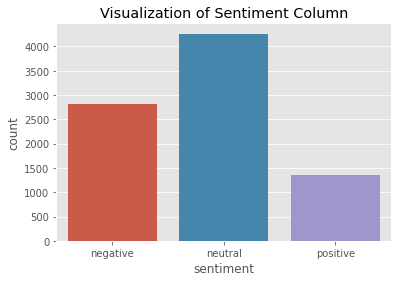

sentiment
neutral     4262
negative    2813
positive    1362
dtype: int64


In [ ]:
sns.countplot(x= "sentiment", data=trainData)
plt.title("Visualization of Sentiment Column")
plt.show()
print(trainData.value_counts("sentiment"))

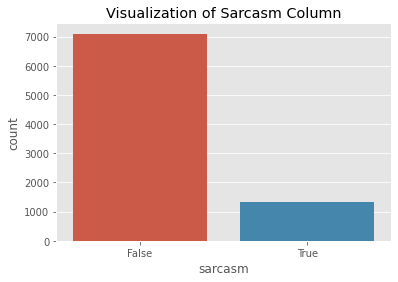

sarcasm
False    7100
True     1337
dtype: int64


In [ ]:
sns.countplot(x= "sarcasm", data= trainData)
plt.title("Visualization of Sarcasm Column")
plt.show()
print(trainData.value_counts("sarcasm"))

dialect
msa       5652
egypt     1904
levant     439
gulf       414
magreb      28
dtype: int64


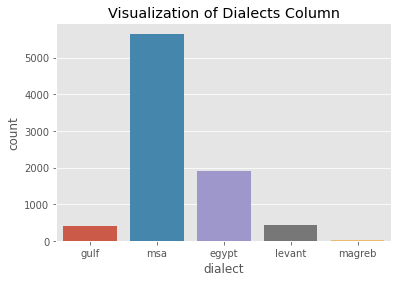

In [ ]:
sns.countplot(x= "dialect", data= trainData)
plt.title("Visualization of Dialects Column")
print(trainData.value_counts("dialect"))
plt.show()

# **Data Cleaning Pipeline**

In [ ]:
def clean(text):
  #replace all usernames with مستخدم 
  text = re.sub(r'\s*@([A-Za-z]*[0-9]*)(_*)([A-Za-z]*[0-9]*)\s*', ' مستخدم ' , text)
  #replace all urls with رابط
  text = re.sub(r"((www\.[^\s]+)|(https?://[^\s]+))", " رابط ", text)
  #remove all English chars 
  text = re.sub(r'\s*[A-Za-z]\s*', ' ' , text)
  #remove hashtags
  text = re.sub("#", " ", text)
  #remove all numbers 
  text = re.sub(r'\[0-9]*\]',' ',text)
  #remove duplicated chars
  text = re.sub(r'(.)\1+', r'\1', text)
  #remove :) or :(
  text = text.replace(':)', "")
  text = text.replace(':(', "")
  #remove multiple exclamation
  text = re.sub(r"(\!)\1+", ' ', text)
  #remove multiple question marks
  text = re.sub(r"(\?)\1+", ' ', text)
  #remove multistop
  text = re.sub(r"(\.)\1+", ' ', text)
  #remove additional spaces
  text = re.sub(r"[\s]+", " ", text)
  text = re.sub(r"[\n]+", " ", text)

  
  return text

In [ ]:
def cleanPipeline():
  stopWordsList = stopwords.words('arabic')

  trainData["tweet"] = trainData["tweet"].apply(lambda line: " ".join(word for word in line.split() if word not in stopWordsList))
  trainData["tweet"] = trainData["tweet"].apply(lambda x : clean(x))
  trainData["tweet"] = trainData['tweet'].str.replace('[{}]'.format(string.punctuation), ' ')
  trainData["tweet"]= trainData["tweet"].apply(lambda line: " ".join(st.stem(word) for word in line.split()))

  testData["tweet"] = testData["tweet"].apply(lambda line: " ".join(word for word in line.split() if word not in stopWordsList))
  testData["tweet"] = testData["tweet"].apply(lambda x : clean(x))
  testData["tweet"] = testData['tweet'].str.replace('[{}]'.format(string.punctuation), ' ')
  testData['tweet']= testData["tweet"].apply(lambda line: " ".join(st.stem(word) for word in line.split()))

In [ ]:
cleanPipeline()

In [ ]:
trainData.head()

,dialect,sarcasm,sentiment,tweet
0,gulf,False,negative,نصح عمر نزل لعب وبر ارو مش زي كنا توقع اله رحم...
1,msa,False,neutral,ناد نسب نجم ❤️❤️❤️مجلة اري كلر 💭 لكة صحراء 👑 ر...
2,egypt,False,neutral,خدم وقع انه سمر
3,levant,True,neutral,خدم يعن وفق لأن دمشق صير وسكو
4,msa,False,neutral,خدم قئد حرس عرف فقد يطر مني شرق غرب اير حوز حو...


In [ ]:
testData.head()

,dialect,sarcasm,sentiment,tweet
0,msa,True,negative,خدم خدم ه حزب اله حطم سطر ميركاف اسرائيليه عام...
1,gulf,False,positive,خدم بنت الي صمو بقل ترا رمض قرب وقت قلل الي نا...
2,msa,True,neutral,شرة ربع اشب بنر حرق قلب
3,msa,False,neutral,خدم اهي ميز درج زنس علم اني روكسيل ارد ذهب مصر...
4,msa,False,neutral,تره لفز نفس شدد رشح هيلار كلن دونالد رمب ربط


In [ ]:
trainData_sarcasm=trainData.copy()
testData_sarcasm=testData.copy()
trainData_sarcasm.drop(["sentiment","dialect"],axis=1,inplace=True)
testData_sarcasm.drop(["sentiment","dialect"],axis=1,inplace=True)


In [ ]:
trainData_sarcasm.head()

,sarcasm,tweet
0,False,نصح عمر نزل لعب وبر ارو مش زي كنا توقع اله رحم...
1,False,ناد نسب نجم ❤️❤️❤️مجلة اري كلر 💭 لكة صحراء 👑 ر...
2,False,خدم وقع انه سمر
3,True,خدم يعن وفق لأن دمشق صير وسكو
4,False,خدم قئد حرس عرف فقد يطر مني شرق غرب اير حوز حو...


# Sarcasm Label Encoding

In [ ]:
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'species'.
trainData_sarcasm['sarcasm']= label_encoder.fit_transform(trainData_sarcasm['sarcasm'])
testData_sarcasm['sarcasm']= label_encoder.fit_transform(testData_sarcasm['sarcasm'])
trainData_sarcasm.head()

,sarcasm,tweet
0,0,نصح عمر نزل لعب وبر ارو مش زي كنا توقع اله رحم...
1,0,ناد نسب نجم ❤️❤️❤️مجلة اري كلر 💭 لكة صحراء 👑 ر...
2,0,خدم وقع انه سمر
3,1,خدم يعن وفق لأن دمشق صير وسكو
4,0,خدم قئد حرس عرف فقد يطر مني شرق غرب اير حوز حو...


In [ ]:
testData_sarcasm.head()

,sarcasm,tweet
0,1,خدم خدم ه حزب اله حطم سطر ميركاف اسرائيليه عام...
1,0,خدم بنت الي صمو بقل ترا رمض قرب وقت قلل الي نا...
2,1,شرة ربع اشب بنر حرق قلب
3,0,خدم اهي ميز درج زنس علم اني روكسيل ارد ذهب مصر...
4,0,تره لفز نفس شدد رشح هيلار كلن دونالد رمب ربط


# Convert Text to Features using tf-idf


In [ ]:
# sarcasm
train_x, valid_x, train_y, valid_y = trainData_sarcasm['tweet'],testData_sarcasm['tweet'],trainData_sarcasm['sarcasm'],testData_sarcasm['sarcasm']
print(len(set(train_y)))
print(len(set(valid_y)))
# TFIDF feature generation for a maximum of 5000 features
print("vaild X",valid_x.head())
print("vaild Y",valid_y.head())
# encoder = preprocessing.LabelEncoder()
# train_y = encoder.fit_transform(train_y)
# valid_y = encoder.fit_transform(valid_y)
tfidf_vect = TfidfVectorizer(analyzer='word',token_pattern=r'\w{1,}', max_features=10000)
print(tfidf_vect)
tfidf_vect.fit(trainData_sarcasm['tweet'])
xtrain_tfidf = tfidf_vect.transform(train_x)
xvalid_tfidf = tfidf_vect.transform(valid_x)
print(xtrain_tfidf.data)

2
2
vaild X 0    خدم خدم ه حزب اله حطم سطر ميركاف اسرائيليه عام...
1    خدم بنت الي صمو بقل ترا رمض قرب وقت قلل الي نا...
2                              شرة ربع اشب بنر حرق قلب
3    خدم اهي ميز درج زنس علم اني روكسيل ارد ذهب مصر...
4         تره لفز نفس شدد رشح هيلار كلن دونالد رمب ربط
Name: tweet, dtype: object
vaild Y 0    1
1    0
2    1
3    0
4    0
Name: sarcasm, dtype: int64
TfidfVectorizer(max_features=10000, token_pattern='\\w{1,}')
[0.23664219 0.28748692 0.23161989 ... 0.22089683 0.2261289  0.33029856]


In [ ]:
def train_model(classifier, feature_vector_train, label,feature_vector_valid, is_neural_net=False):
    # fit the training dataset on the classifier
    classifier.fit(feature_vector_train, label)
    # predict the labels on validation dataset
    predictions = classifier.predict(feature_vector_valid)
    return metrics.accuracy_score(predictions, valid_y),predictions

# SVM To predict Sarcasm or not

In [ ]:
clf_svm = svm.SVC(kernel='linear')
#train_model
accuracy,predictions=train_model(clf_svm,xtrain_tfidf, train_y, xvalid_tfidf)
print("accuracy_for_sarcasm: ",accuracy*100)
print("-----------------------------------------------------")
print("-----------------------------------------------------")
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(valid_y,predictions))

accuracy_for_sarcasm:  85.2132701421801
-----------------------------------------------------
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.86      0.98      0.92      1765
           1       0.67      0.19      0.29       345

    accuracy                           0.85      2110
   macro avg       0.77      0.58      0.60      2110
weighted avg       0.83      0.85      0.82      2110



In [ ]:
import numpy as np
text_clean="منتج رائع"
def convert_sample_to_numbers(text):
  text_result=tfidf_vect.transform([text])
  return text_result
test=convert_sample_to_numbers(text_clean)
  
print(label_encoder.inverse_transform(clf_svm.predict(test))) 

[False]


In [ ]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
RandomForestClassifier_model=RandomForestClassifier(n_estimators=100)
#train_model
accuracy,predictions=train_model(RandomForestClassifier_model,xtrain_tfidf, train_y, xvalid_tfidf)
print("RandomForestClassifier_model accuracy_for_sarcasm: ",accuracy*100)
print("-----------------------------------------------------")
print("-----------------------------------------------------")
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(valid_y,predictions))

RandomForestClassifier_model accuracy_for_sarcasm:  84.92890995260663
-----------------------------------------------------
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.85      0.99      0.92      1765
           1       0.71      0.13      0.22       345

    accuracy                           0.85      2110
   macro avg       0.78      0.56      0.57      2110
weighted avg       0.83      0.85      0.80      2110



In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=3)

accuracy,predictions=train_model(knn_model,xtrain_tfidf,train_y,xvalid_tfidf)
print("KNN accuracy_for_sarcasm: ",accuracy*100)
print("-----------------------------------------------------")
print("-----------------------------------------------------")
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(valid_y,predictions))

KNN accuracy_for_sarcasm:  83.55450236966824
-----------------------------------------------------
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.86      0.96      0.91      1765
           1       0.49      0.20      0.28       345

    accuracy                           0.84      2110
   macro avg       0.68      0.58      0.59      2110
weighted avg       0.80      0.84      0.80      2110



In [ ]:
import numpy as np
text_clean="منتج رائع"
def convert_sample_to_numbers(text):
  text_result=tfidf_vect.transform([text])
  return text_result
test=convert_sample_to_numbers(text_clean)

print(label_encoder.inverse_transform(knn_model.predict(test))) 

[False]


In [ ]:
from sklearn.tree import DecisionTreeClassifier
# Create Decision Tree classifer object
clf_decisionTree = DecisionTreeClassifier()

accuracy,predictions=train_model(clf_decisionTree,xtrain_tfidf,train_y,xvalid_tfidf)
print("DecisionTreeClassifier accuracy_for_sarcasm: ",accuracy*100)
print("-----------------------------------------------------")
print("-----------------------------------------------------")
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(valid_y,predictions))

DecisionTreeClassifier accuracy_for_sarcasm:  80.90047393364928
-----------------------------------------------------
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.89      0.89      1765
           1       0.41      0.38      0.39       345

    accuracy                           0.81      2110
   macro avg       0.64      0.64      0.64      2110
weighted avg       0.80      0.81      0.81      2110



In [ ]:
import numpy as np
text_clean="منتج رائع"
def convert_sample_to_numbers(text):
  text_result=tfidf_vect.transform([text])
  return text_result
test=convert_sample_to_numbers(text_clean)
 
print(label_encoder.inverse_transform(knn_model.predict(test))) 

[False]


In [ ]:
from sklearn.naive_bayes import ComplementNB
# Create ComplementNB classifer object
clf_ComplementNB = ComplementNB()

accuracy,predictions=train_model(clf_ComplementNB,xtrain_tfidf.toarray(),train_y,xvalid_tfidf.toarray())
print("ComplementNB classifer accuracy_for_sarcasm: ",accuracy*100)
print("-----------------------------------------------------")
print("-----------------------------------------------------")
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(valid_y,predictions))

ComplementNB classifer accuracy_for_sarcasm:  84.40758293838863
-----------------------------------------------------
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1765
           1       0.55      0.24      0.34       345

    accuracy                           0.84      2110
   macro avg       0.71      0.60      0.62      2110
weighted avg       0.82      0.84      0.82      2110



In [ ]:
trainData_sentiment=trainData.copy()
testData_sentiment=testData.copy()
trainData_sentiment.drop(["sarcasm","dialect"],axis=1,inplace=True)
testData_sentiment.drop(["sarcasm","dialect"],axis=1,inplace=True)
trainData_sentiment.head()

,sentiment,tweet
0,negative,نصح عمر نزل لعب وبر ارو مش زي كنا توقع اله رحم...
1,neutral,ناد نسب نجم ❤️❤️❤️مجلة اري كلر 💭 لكة صحراء 👑 ر...
2,neutral,خدم وقع انه سمر
3,neutral,خدم يعن وفق لأن دمشق صير وسكو
4,neutral,خدم قئد حرس عرف فقد يطر مني شرق غرب اير حوز حو...


# sentiment Label Encoding

In [ ]:
# label_encoder object knows how to understand word labels.
label_encoder_sentiment = preprocessing.LabelEncoder()
# Encode labels in column 'species'.
trainData_sentiment['sentiment']= label_encoder_sentiment.fit_transform(trainData_sentiment['sentiment'])
testData_sentiment['sentiment']= label_encoder_sentiment.fit_transform(testData_sentiment['sentiment'])
trainData_sentiment.head()

,sentiment,tweet
0,0,نصح عمر نزل لعب وبر ارو مش زي كنا توقع اله رحم...
1,1,ناد نسب نجم ❤️❤️❤️مجلة اري كلر 💭 لكة صحراء 👑 ر...
2,1,خدم وقع انه سمر
3,1,خدم يعن وفق لأن دمشق صير وسكو
4,1,خدم قئد حرس عرف فقد يطر مني شرق غرب اير حوز حو...


In [ ]:
# sentiment

train_x, valid_x, train_y, valid_y = trainData_sentiment['tweet'],testData_sentiment['tweet'],trainData_sentiment['sentiment'],testData_sentiment['sentiment']
print(len(set(train_y)))
print(len(set(valid_y)))
# TFIDF feature generation for a maximum of 5000 features
print("vaild X",valid_x.head())
print("vaild Y",valid_y.head())
tfidf_vect = TfidfVectorizer(analyzer='word',token_pattern=r'\w{1,}', max_features=5000)
print(tfidf_vect)
tfidf_vect.fit(trainData_sentiment['tweet'])
xtrain_tfidf_sentiment = tfidf_vect.transform(train_x)
xvalid_tfidf_sentiment = tfidf_vect.transform(valid_x)
print(xtrain_tfidf.data)

3
3
vaild X 0    خدم خدم ه حزب اله حطم سطر ميركاف اسرائيليه عام...
1    خدم بنت الي صمو بقل ترا رمض قرب وقت قلل الي نا...
2                              شرة ربع اشب بنر حرق قلب
3    خدم اهي ميز درج زنس علم اني روكسيل ارد ذهب مصر...
4         تره لفز نفس شدد رشح هيلار كلن دونالد رمب ربط
Name: tweet, dtype: object
vaild Y 0    0
1    2
2    1
3    1
4    1
Name: sentiment, dtype: int64
TfidfVectorizer(max_features=5000, token_pattern='\\w{1,}')
[0.31124131 0.16312454 0.27121338 ... 0.34689618 0.23199989 0.23928945]


#SVM Sentiment

In [ ]:
clf_svm_sentiment = svm.SVC(kernel='linear')
#train_model
accuracy,predictions=train_model(clf_svm_sentiment,xtrain_tfidf_sentiment, train_y, xvalid_tfidf_sentiment)
print("accuracy_for_sarcasm: ",accuracy*100)
print("-----------------------------------------------------")
print("-----------------------------------------------------")
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(valid_y,predictions))

accuracy_for_sarcasm:  67.58293838862559
-----------------------------------------------------
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.64      0.63      0.64       716
           1       0.70      0.80      0.74      1078
           2       0.65      0.37      0.47       316

    accuracy                           0.68      2110
   macro avg       0.66      0.60      0.62      2110
weighted avg       0.67      0.68      0.67      2110



In [ ]:
import numpy as np
text_clean="الأمين العام للأمم المتحدة: بشار الأسد قتل 300 ألف شخص فى سوريا"
def convert_sample_to_numbers(text):
  text_result=tfidf_vect.transform([text])
  return text_result
test=convert_sample_to_numbers(text_clean)

print(label_encoder_sentiment.inverse_transform(clf_svm_sentiment.predict(test))) 

['negative']


#KNN for Sentiment 

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_model_sentiment = KNeighborsClassifier(n_neighbors=3)

accuracy,predictions=train_model(knn_model_sentiment,xtrain_tfidf_sentiment,train_y,xvalid_tfidf_sentiment)
print("KNN accuracy_for_sarcasm: ",accuracy*100)
print("-----------------------------------------------------")
print("-----------------------------------------------------")
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(valid_y,predictions))

KNN accuracy_for_sarcasm:  59.19431279620853
-----------------------------------------------------
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.55      0.47      0.51       716
           1       0.64      0.74      0.69      1078
           2       0.45      0.36      0.40       316

    accuracy                           0.59      2110
   macro avg       0.55      0.52      0.53      2110
weighted avg       0.58      0.59      0.58      2110



In [ ]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
RandomForestClassifier_model=RandomForestClassifier(n_estimators=100)

accuracy,predictions=train_model(RandomForestClassifier_model,xtrain_tfidf_sentiment,train_y,xvalid_tfidf_sentiment)
print("RandomForestClassifier_model accuracy_for_sentiment: ",accuracy*100)
print("-----------------------------------------------------")
print("-----------------------------------------------------")
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(valid_y,predictions))

RandomForestClassifier_model accuracy_for_sentiment:  66.39810426540285
-----------------------------------------------------
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.63      0.64      0.63       716
           1       0.69      0.79      0.74      1078
           2       0.59      0.30      0.40       316

    accuracy                           0.66      2110
   macro avg       0.64      0.58      0.59      2110
weighted avg       0.66      0.66      0.65      2110



In [ ]:
from sklearn.tree import DecisionTreeClassifier
# Create Decision Tree classifer object
clf_decisionTree_sentiment = DecisionTreeClassifier()

accuracy,predictions=train_model(clf_decisionTree_sentiment,xtrain_tfidf_sentiment,train_y,xvalid_tfidf_sentiment)
print("DecisionTreeClassifier accuracy_for_sentiment: ",accuracy*100)
print("-----------------------------------------------------")
print("-----------------------------------------------------")
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(valid_y,predictions))

DecisionTreeClassifier accuracy_for_sentiment:  57.72511848341232
-----------------------------------------------------
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.53      0.56      0.54       716
           1       0.67      0.65      0.66      1078
           2       0.37      0.37      0.37       316

    accuracy                           0.58      2110
   macro avg       0.53      0.53      0.53      2110
weighted avg       0.58      0.58      0.58      2110



In [ ]:
# Create ComplementNB classifer object
clf_ComplementNB = ComplementNB()

accuracy,predictions=train_model(clf_ComplementNB,xtrain_tfidf_sentiment.toarray(),train_y,xvalid_tfidf_sentiment.toarray())
print("ComplementNB classifer accuracy_for_sentiment: ",accuracy*100)
print("-----------------------------------------------------")
print("-----------------------------------------------------")
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(valid_y,predictions))

ComplementNB classifer accuracy_for_sentiment:  68.00947867298578
-----------------------------------------------------
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.65      0.71      0.68       716
           1       0.76      0.72      0.74      1078
           2       0.48      0.46      0.47       316

    accuracy                           0.68      2110
   macro avg       0.63      0.63      0.63      2110
weighted avg       0.68      0.68      0.68      2110

